In [49]:
import pytesseract as pt
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output

In [40]:
projeto = "../text-recognize/Imagens/Projeto"

# os.listdir(projeto)
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
for i in range(len(caminho)):
    caminho[i] = caminho[i].replace("\\", "/")
print(caminho)
caminho

['../text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '../text-recognize/Imagens/Projeto/artigo-eng-dados.png', '../text-recognize/Imagens/Projeto/artigo-spark.png', '../text-recognize/Imagens/Projeto/artigo-termos-ML.png']


['../text-recognize/Imagens/Projeto/artigo-desbalanceamento.png',
 '../text-recognize/Imagens/Projeto/artigo-eng-dados.png',
 '../text-recognize/Imagens/Projeto/artigo-spark.png',
 '../text-recognize/Imagens/Projeto/artigo-termos-ML.png']

In [39]:
teste = cv2.imread(
    # "C:/Users/ruben/Documents/ALPHAEDTECH/HARD/CICLO-1/MODULO-10-VISAO-COMPUTACIONAL/Visão-Computacional-reconhecimento-texto-OCR-OpenCV/Meus-Testes/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png"
    "../text-recognize/Imagens/Projeto/artigo-desbalanceamento.png"
)
print(teste)

[[[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [253 251 250]
  [253 251 250]]

 [[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [253 251 250]
  [253 251 250]]

 [[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [253 251 250]
  [253 251 250]]

 ...

 [[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [253 251 250]
  [253 251 250]]

 [[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [253 251 250]
  [253 251 250]]

 [[253 251 250]
  [253 251 250]
  [253 251 250]
  ...
  [253 251 250]
  [253 251 250]
  [253 251 250]]]


In [20]:
def mostrar(img):
    fig = plt.gcf() # busca a figura atual
    fig.set_size_inches(20, 10) #define o tamanho
    plt.axis("off") #remove a visualização dos eixos
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
    plt.show() # mostra a imagem

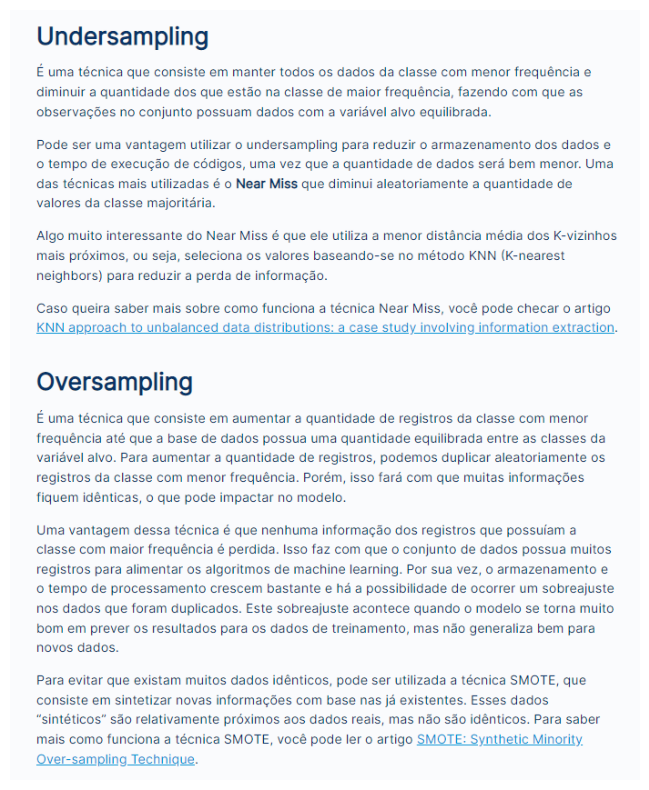

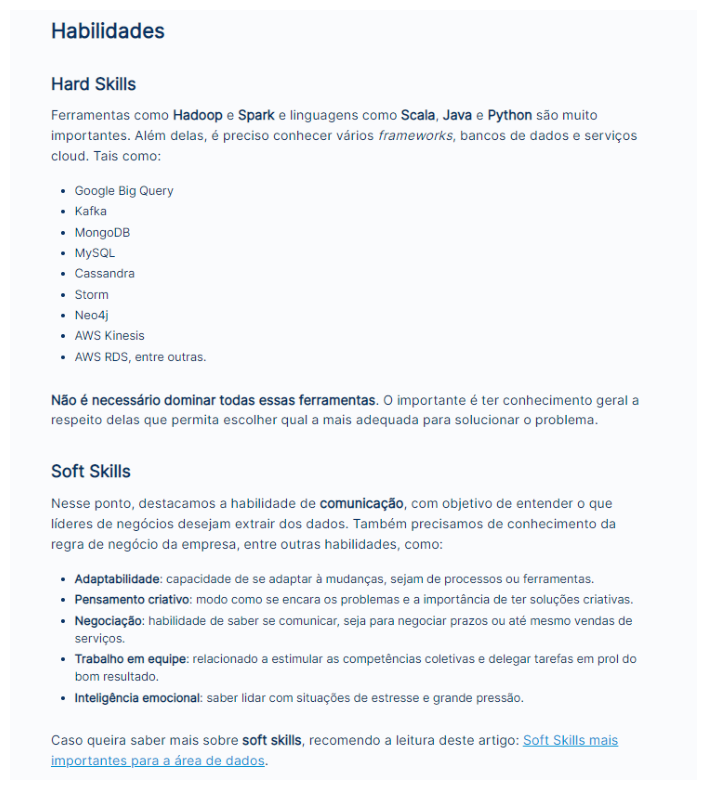

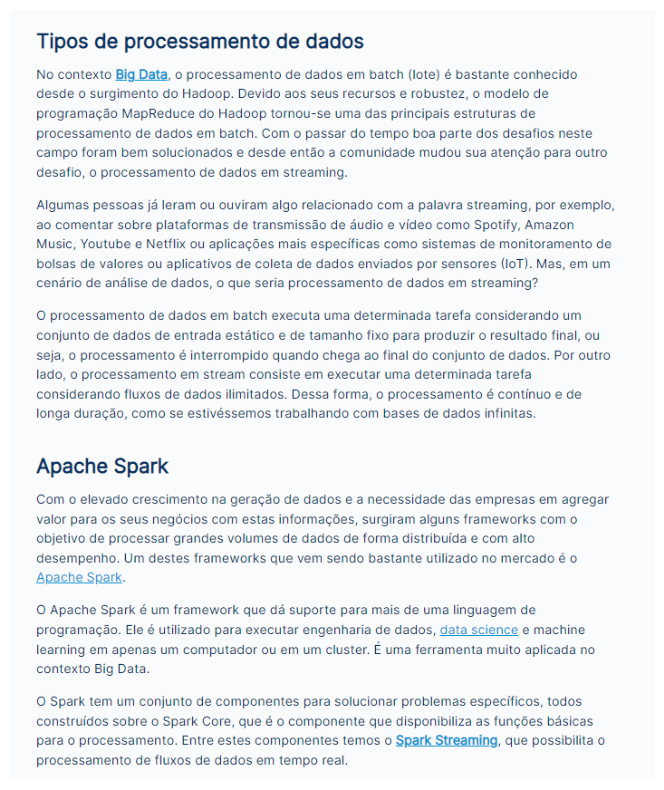

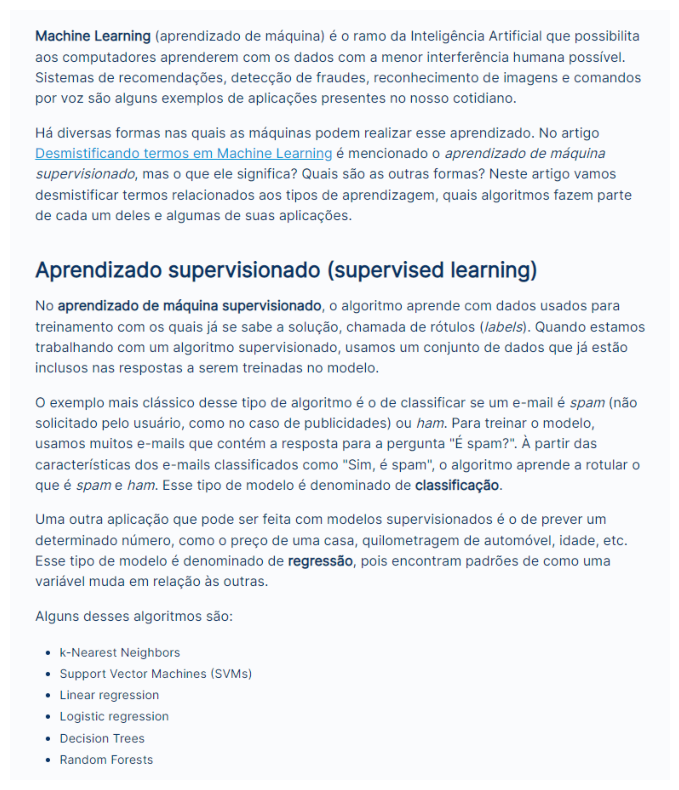

In [42]:
for i in caminho:
    img = cv2.imread(i)
    mostrar(img)

In [51]:
config_tesseract = "--tessdata-dir ../tessdata"
def OCR_processa(img, config_tesseract):
    texto = pt.image_to_string(img, lang='por', config=config_tesseract)
    return texto

In [60]:
texto_completo = ""
nome_txt = "resultados_ocr.txt"

In [61]:
for imagem in caminho:
    img = cv2.imread(imagem)
    nome_imagem = os.path.split(imagem)[-1]
    nome_divisao = '\n\n===================\n' + str(nome_imagem)
    texto_completo = texto_completo + nome_divisao + '\n'
    texto = OCR_processa(img, config_tesseract)
    texto_completo = texto_completo + texto

In [62]:
print(texto_completo)



artigo-desbalanceamento.png
Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.

Pode ser uma vantagem utilizar o undersampling para reduzir o armazenamento dos dados e
o tempo de execução de códigos, uma vez que a quantidade de dados será bem menor. Uma
das técnicas mais utilizadas é o Near Miss que diminui aleatoriamente a quantidade de
valores da classe majoritária.

Algo muito interessante do Near Miss é que ele utiliza a menor distância média dos K-vizinhos
mais próximos, ou seja, seleciona os valores baseando-se no método KNN (K-nearest
neighbors) para reduzir a perda de informação.

Caso queira saber mais sobre como funciona a técnica Near Miss, você pode checar o artigo
KNN approach to unbalanced data distributions: a case study involving information extraction.

Oversamplin

In [63]:
with open(nome_txt, "w+") as arquivo_txt:

    arquivo_txt.write(texto_completo + "\n")
    # arquivo_txt.close()

## Busca por ocorrencia

#### nos texto

In [64]:
termo_pesquisa = "learning"

In [66]:
with open(nome_txt) as f:
    ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]

In [67]:
print(ocorrencias)

[1645, 5734, 6958]


In [68]:
for imagem in caminho:
    img = cv2.imread(imagem)
    nome_imagem = os.path.split(imagem)[-1]
    print('====================\n' + str(nome_imagem))
    texto = OCR_processa(img, config_tesseract)
    ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]
    print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
    print('\n')


artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1


artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0


artigo-spark.png
Número de ocorrências para o termo: learning: 1


artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1




In [70]:
fonte_dir = "../text-recognize/Imagens/calibri.ttf"

In [71]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
    fonte = ImageFont.truetype(fonte_dir, tamanho)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y-tamanho), texto, font = fonte, fill = cor)
    img = np.array(img_pil)
    return img

In [72]:
min_conf = 30

In [73]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
    x = resultado["left"][i]
    y = resultado["top"][i]
    w = resultado["width"][i]
    h = resultado["height"][i]
    cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)
    return x, y, img

In [80]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
    resultado = pt.image_to_data(img, config=config_tesseract, lang='por',
    output_type=Output.DICT)
    num_ocorrencias = 0
    for i in range(0, len(resultado['text'])):
        confianca = float(resultado['conf'][i])
        confianca = int(confianca)
        if confianca > min_conf:
            texto = resultado['text'][i]
            if termo_pesquisa.lower() in texto.lower():
                x, y, img = caixa_texto(i, resultado, img, (0,0,255))
                img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14)
                num_ocorrencias += 1
    return img, num_ocorrencias

artigo-desbalanceamento.png
Número de ocorrências para learning em artigo-desbalanceamento.png: 1




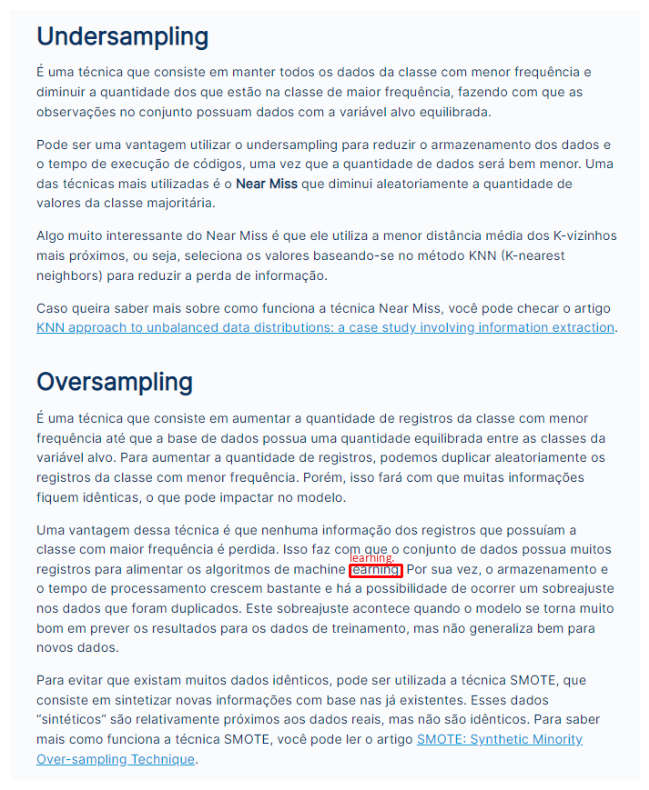

images_project/OCR_artigo-desbalanceamento.png
artigo-eng-dados.png
Número de ocorrências para learning em artigo-eng-dados.png: 0


artigo-spark.png
Número de ocorrências para learning em artigo-spark.png: 1




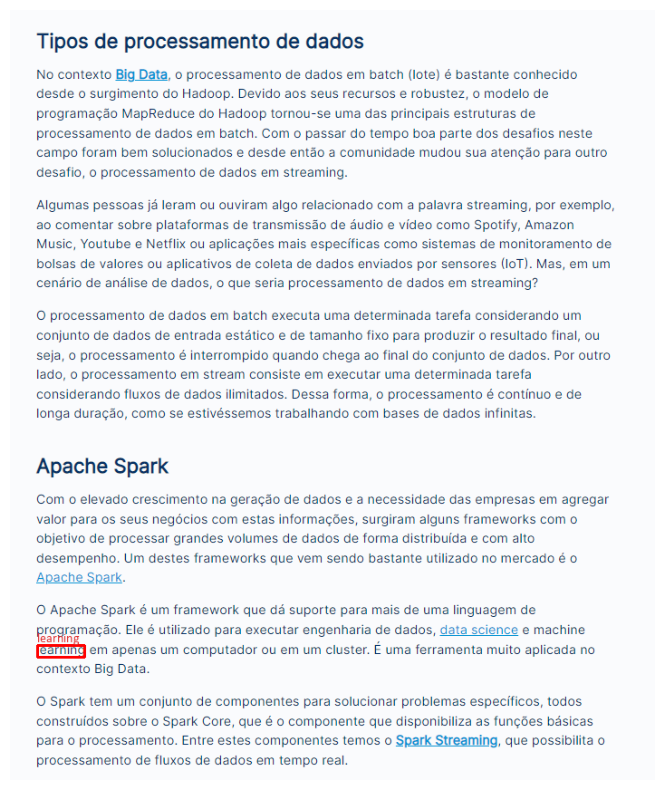

images_project/OCR_artigo-spark.png
artigo-termos-ML.png
Número de ocorrências para learning em artigo-termos-ML.png: 3




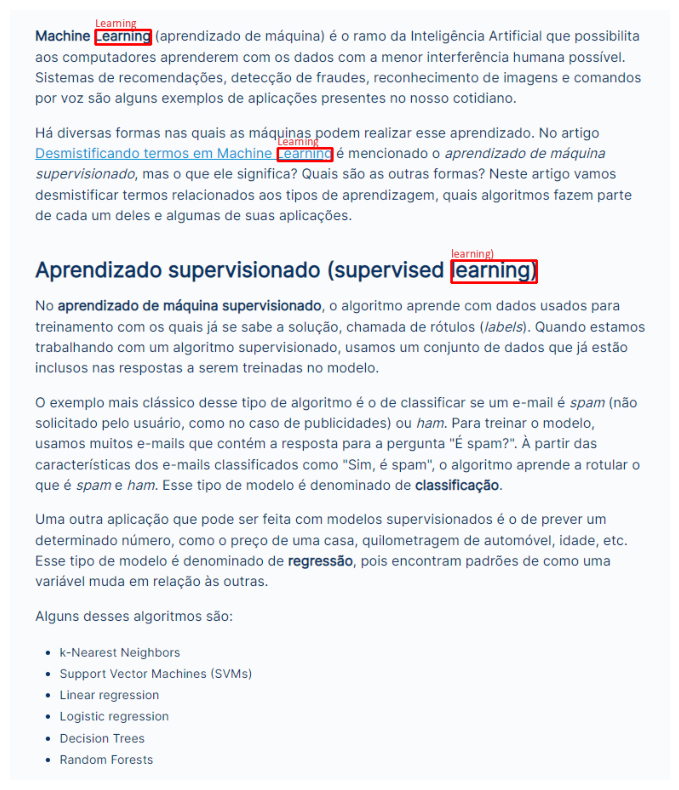

images_project/OCR_artigo-termos-ML.png


In [84]:
termo_pesquisa = 'learning'
for imagem in caminho:
    img = cv2.imread(imagem)
    img_original = img.copy()
    nome_imagem = os.path.split(imagem)[-1]
    print('===================\n' + str(nome_imagem))
    img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract,
    min_conf)
    print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem,
    numero_ocorrencias))
    print('\n')
    # mostrar(img)

    if numero_ocorrencias > 0:
        mostrar (img)
        novo_nome_imagem = 'OCR_' + nome_imagem
        nova_imagem = 'images_project/' + str(novo_nome_imagem)
        print(nova_imagem)
        cv2.imwrite(nova_imagem, img)
